In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, '0.795688'),
 Text(0, 0, '0.644839'),
 Text(0, 0, '0.607892'),
 Text(0, 0, '0.572501'),
 Text(0, 0, '0.487275'),
 Text(0, 0, '0.389272'),
 Text(0, 0, '0.160689'),
 Text(0, 0, '0.160542')]

<Figure size 640x480 with 0 Axes>

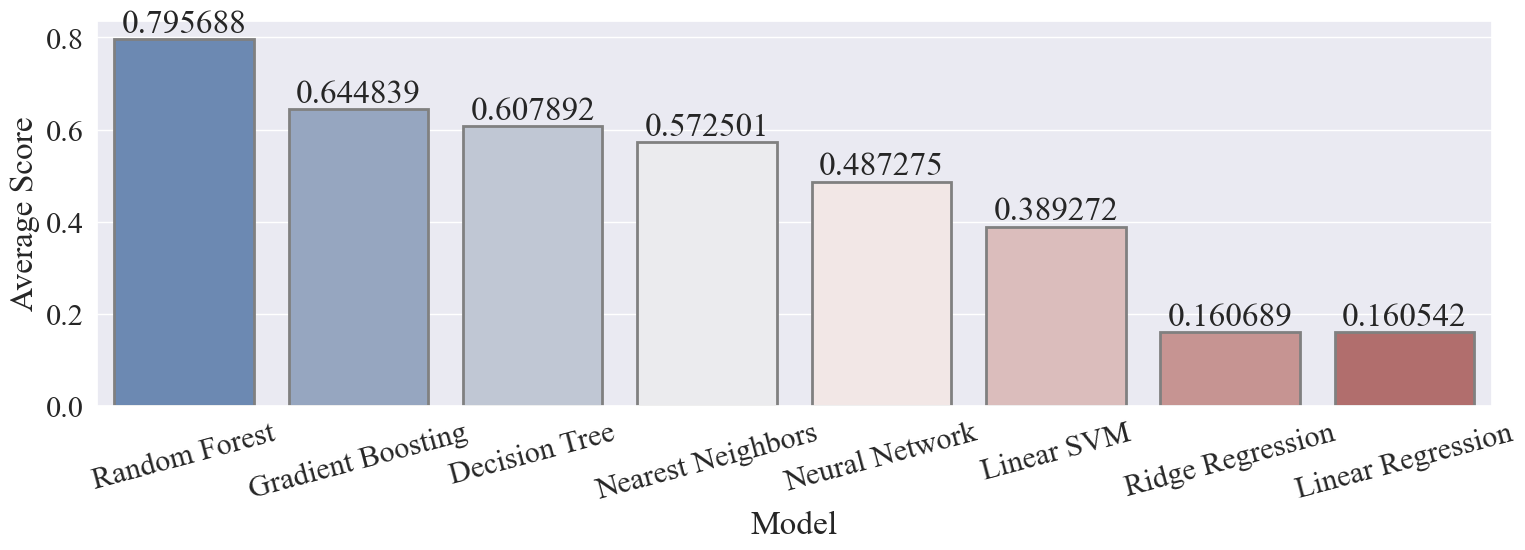

In [2]:
# model comparison for one-year ahead predictions of PoU
model_comparison = pd.read_csv("../data/model_comparison.csv")
model_comparison = model_comparison.sort_values(['Average Score'], ascending=False)

plt.figure()
sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=2)
plt.figure(figsize=(18, 5))
ax = sns.barplot(data = model_comparison, x="Model", y="Average Score", palette="vlag", capsize=.9,
linewidth=2, edgecolor="0.5")

for item in ax.get_xticklabels():
    item.set_rotation(15)

ax.bar_label(ax.containers[0])

In [225]:
# Import dataset
df = pd.read_csv("../data/future_pred_result.csv").drop(columns="Unnamed: 0")
df.head()

,Area,Year,Real Undernourishment,Pred. Undernourishment
0,Afghanistan,2019,29.8,23.805
1,Afghanistan,2018,26.9,23.976
2,Albania,2019,3.9,6.287
3,Albania,2018,4.3,5.838
4,Algeria,2019,0.0,3.552


In [226]:
# Import world map from geopandas dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

pd.set_option("display.max_columns", 10)
pd.set_option("display.width", 1000)

print(world)


         pop_est      continent                      name iso_a3  gdp_md_est                                           geometry
0       889953.0        Oceania                      Fiji    FJI        5496  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1     58005463.0         Africa                  Tanzania    TZA       63177  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2       603253.0         Africa                 W. Sahara    ESH         907  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3     37589262.0  North America                    Canada    CAN     1736425  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    328239523.0  North America  United States of America    USA    21433226  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
..           ...            ...                       ...    ...         ...                                                ...
172    6944975.0         Europe                    Serbia    SRB       51475  POLYGON ((18.82982 45.9088

In [227]:
df_2018 = df[df['Year'] == 2018]
df_2019 = df[df['Year'] == 2019]
print(df_2018.head)

<bound method NDFrame.head of                                    Area  Year  Real Undernourishment  Pred. Undernourishment
1                           Afghanistan  2018                   26.9                  23.976
3                               Albania  2018                    4.3                   5.838
5                               Algeria  2018                    0.0                   7.926
7                                Angola  2018                   17.9                  16.161
9                             Argentina  2018                    3.5                   3.040
..                                  ...   ...                    ...                     ...
300                          Uzbekistan  2018                    0.0                   1.374
303                             Vanuatu  2018                   12.4                  10.199
305  Venezuela (Bolivarian Republic of)  2018                   24.9                   7.472
306                            Viet Nam 

In [228]:
# Merge our data with world geometry data
combined_2018 = world.merge(df_2018, how='left', left_on='name', right_on='Area')
combined_2018.dropna()
combined_2019 = world.merge(df_2019, how='left', left_on='name', right_on='Area')
combined_2019.dropna()

combined_2018.to_csv("../data/combined_geo_data_2018.csv")
combined_2018.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pop_est                 177 non-null    float64 
 1   continent               177 non-null    object  
 2   name                    177 non-null    object  
 3   iso_a3                  177 non-null    object  
 4   gdp_md_est              177 non-null    int64   
 5   geometry                177 non-null    geometry
 6   Area                    126 non-null    object  
 7   Year                    126 non-null    float64 
 8   Real Undernourishment   126 non-null    float64 
 9   Pred. Undernourishment  126 non-null    float64 
dtypes: float64(4), geometry(1), int64(1), object(4)
memory usage: 15.2+ KB


In [229]:
# Using folium to visualize data

import folium
from folium.plugins import StripePattern

# Set the map and the start position
pred_map_2018 = folium.Map(location=[16, 18], zoom_start=3)

# Make the legend draggable STARTS from HERE
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:repeating-linear-gradient(
    45deg,
    #ffffff,
    #ffffff 3px,
    #c5c5c5 3px,
    #c5c5c5 6px);opacity:0.7;'></span>Country that has No data.</li>
    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

pred_map_2018.get_root().add_child(macro) # Make the legend draggable ENDS HERE

folium.Choropleth(
    geo_data=combined_2018,
    data=combined_2018,
    columns=["Area", "Pred. Undernourishment"],
    key_on="feature.properties.name",
    fill_color="YlOrBr",
    fill_opacity=0.7,
    line_color = "black",
    line_opacity=0.5,
    nan_fill_color = "White",
    name='Undernourishment',
    legend_name="Undernourishment Prediction 2018 (%)",
    smooth_factor=0,
    Highlight= True,
    show=True,
    overlay=True,
    reset=True,
).add_to(pred_map_2018)


In [230]:
# Add stripes pattern to no data countries

nans = combined_2018[combined_2018["Area"].isnull()]['name'].values
gdf_nans = combined_2018[combined_2018['name'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')
sp.add_to(pred_map_2018)
folium.features.GeoJson(name="No data",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(pred_map_2018)

# Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(pred_map_2018)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = combined_2018,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Area','Pred. Undernourishment'],
        aliases=['Area','Pred. Undernourishment'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
pred_map_2018.add_child(NIL)
pred_map_2018.keep_in_front(NIL)

pred_map_2018